In [ ]:
!git clone https://github.com/Amahseyn/Oral_Cancer.git

fatal: destination path 'Oral_Cancer' already exists and is not an empty directory.


Found 1633 images belonging to 2 classes.
Found 409 images belonging to 2 classes.
Found 228 images belonging to 2 classes.
Epoch 1/300
26/26 [==============================] - 25s 573ms/step - loss: 0.8512 - accuracy: 0.6062 - val_loss: 0.8361 - val_accuracy: 0.4914
Epoch 2/300
26/26 [==============================] - 9s 340ms/step - loss: 0.6604 - accuracy: 0.6889 - val_loss: 1.2362 - val_accuracy: 0.4914
Epoch 3/300
26/26 [==============================] - 9s 348ms/step - loss: 0.5829 - accuracy: 0.7165 - val_loss: 1.8220 - val_accuracy: 0.4914
Epoch 4/300
26/26 [==============================] - 8s 315ms/step - loss: 0.5458 - accuracy: 0.7379 - val_loss: 2.4761 - val_accuracy: 0.4914
Epoch 5/300
26/26 [==============================] - 9s 337ms/step - loss: 0.4966 - accuracy: 0.7630 - val_loss: 2.9111 - val_accuracy: 0.4914
Epoch 6/300
26/26 [==============================] - 9s 360ms/step - loss: 0.4869 - accuracy: 0.7716 - val_loss: 3.1681 - val_accuracy: 0.4914
Epoch 7/300
26/26

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 1s 308ms/step - loss: 0.4527 - accuracy: 0.9079
Test accuracy: 0.9079


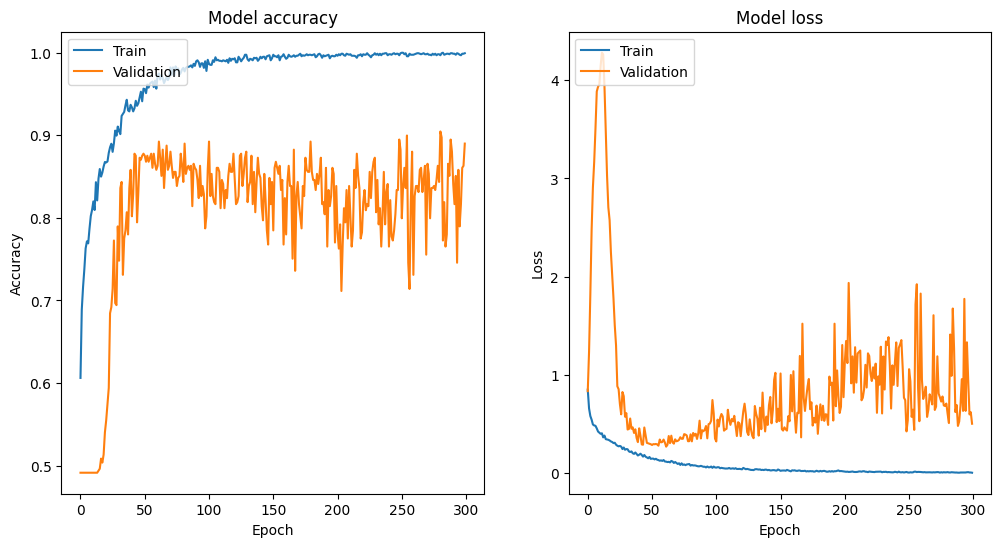

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Define paths
train_dir = '/content/drive/MyDrive/Oral_Cancer/Train'
val_dir = '/content/drive/MyDrive/Oral_Cancer/Validation'
test_dir = '/content/drive/MyDrive/Oral_Cancer/Test'

# Parameters
image_width = 128
image_height = 128
batch_size = 64

# Create ImageDataGenerators with enhanced augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5, min_lr=1e-7)

# Ensure steps_per_epoch and validation_steps are at least 1
steps_per_epoch = max(1, len(train_generator))
validation_steps = max(1, len(validation_generator))

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=300,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

# Save the model
model.save('image_classification_model.h5')

# Evaluate the model on the test set
test_steps = max(1, len(test_generator))
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps)
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
